# **Zomato Data Analysis Project**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
df.shape

(148, 7)

In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
df.dtypes

,0
name,object
online_order,object
book_table,object
rate,object
votes,int64
approx_cost(for two people),int64
listed_in(type),object


In [ ]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [ ]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


**#1. What type of resturant majority customer order from?**

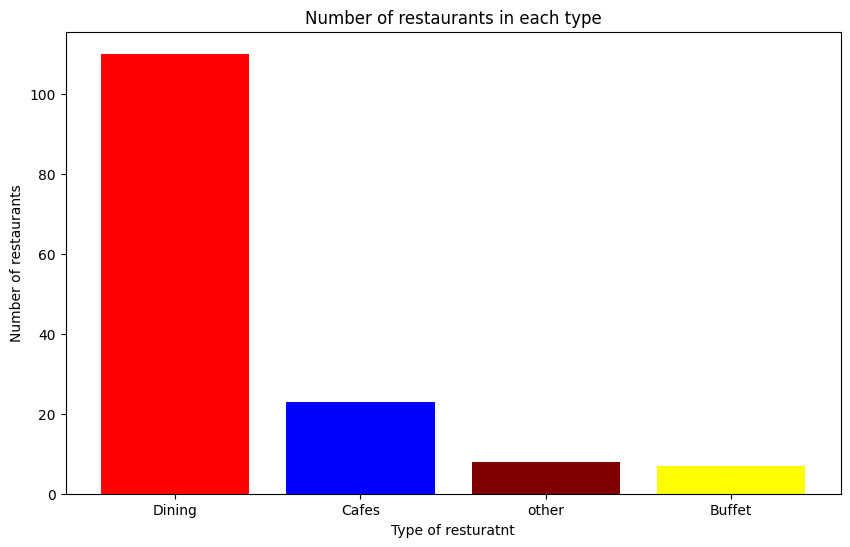

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df['listed_in(type)'].value_counts().index, df['listed_in(type)'].value_counts(), color=['red','blue','maroon','yellow'])
plt.xlabel('Type of resturatnt')
plt.ylabel('Number of restaurants')
plt.title('Number of restaurants in each type')
plt.show()

**#2. How many votes each resturant received from customer?**

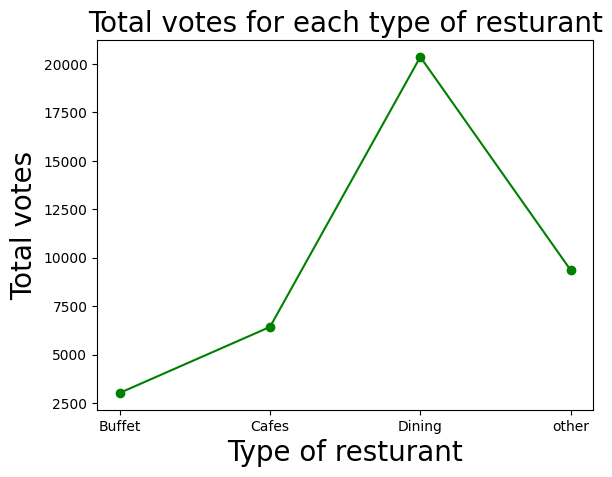

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.plot(result,c = 'green', marker = 'o')
plt.xlabel('Type of resturant', size = 20)
plt.ylabel('Total votes', size = 20)
plt.title('Total votes for each type of resturant', size = 20)
plt.show()

**#3. What are the ratings the majority of the resturant received?**

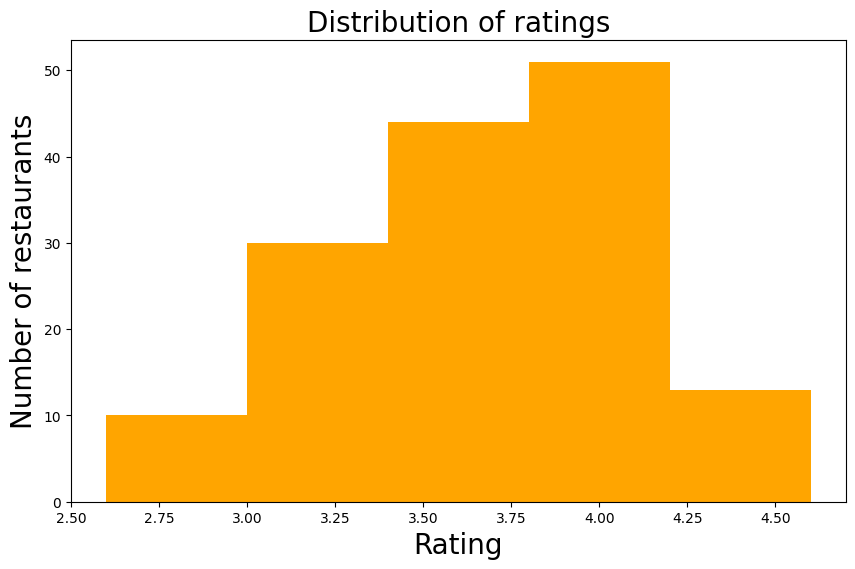

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['rate'], bins = 5, color = 'orange')
plt.xlabel('Rating', size = 20)
plt.ylabel('Number of restaurants', size = 20)
plt.title('Distribution of ratings', size = 20)
plt.show()

**#4. Average order spending ?**

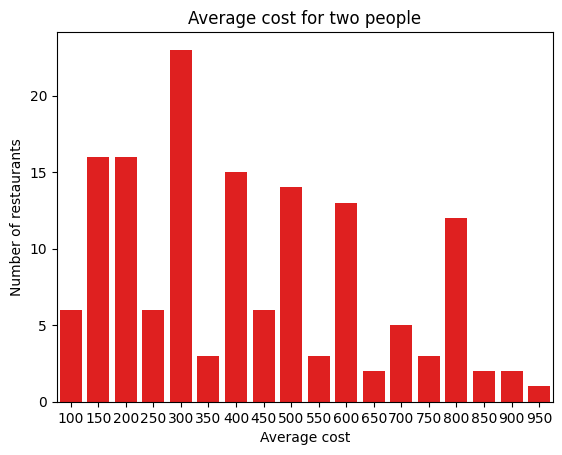

In [ ]:
avg_cost= df['approx_cost(for two people)']
sns.countplot(x = avg_cost, color = 'red')
plt.xlabel('Average cost')
plt.ylabel('Number of restaurants')
plt.title('Average cost for two people')
plt.show()


**#5. Which mode receives maximum rating**

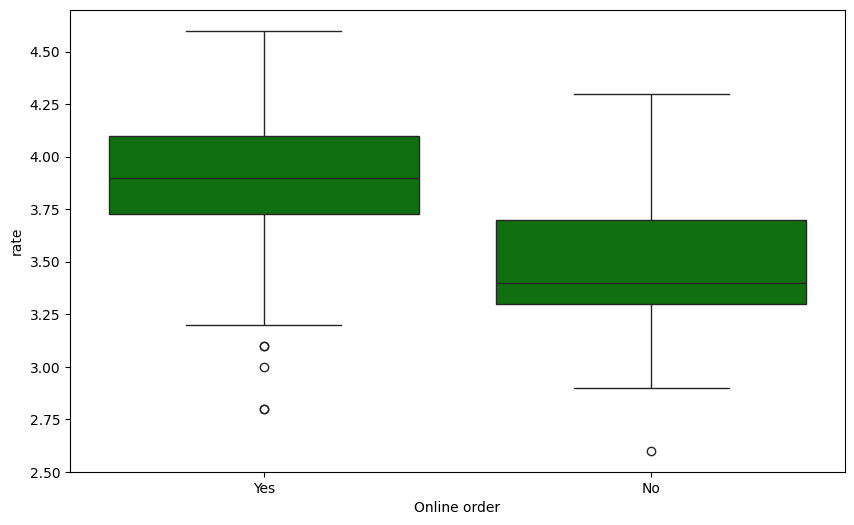

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df, color = ('green') )
plt.xlabel('Online order')
plt.show()

**#6. Which resturant received more offline orders?**

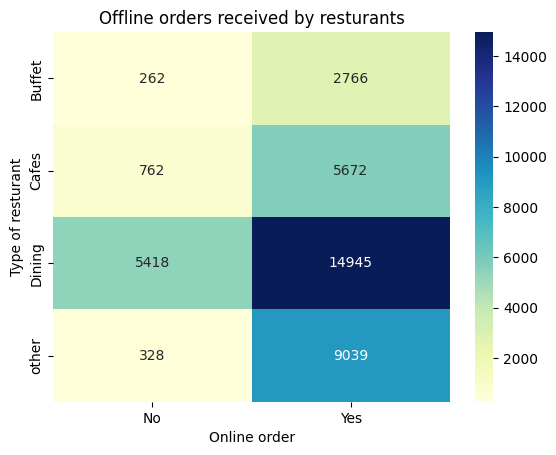

In [ ]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', values = 'votes', aggfunc = 'sum', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title('Offline orders received by resturants')
plt.xlabel('Online order')
plt.ylabel('Type of resturant')
plt.show()
